## Imports

In [1]:
import sys
sys.path.append("../figures")

from where_chicago import WhereGrey, RetinaWhiten, TransformDico, ChicagoFacesDataset,  WhatGender, WhatGenderTrainer, WhereResize

In [2]:
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from main import init
args = init(filename='../data/2019-07-23')
args

{'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 48,
 'N_eccentricity': 24,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True}

In [4]:
from retina_chicago import Retina
retina = Retina(args)

../tmp/retina_6_48_24_2_1.41_1718_dico.npy
Fichier retina_dico charge avec succes


## Chargement d'un dataset

In [5]:
dataset_train = ChicagoFacesDataset(args, use='train')

In [6]:
image = dataset_train[3][0]
print(image)
#image.show()

<PIL.Image.Image image mode=RGB size=2444x1718 at 0xA8821D0>


In [7]:
def resize(image) :
    nb_filters = args.N_azimuth * args.N_eccentricity * args.N_theta * args.N_phase
    ratio = args.N_X / args.N_Y
    print(nb_filters, ratio)
    # On veut :
    # N_X2/N_Y2 ~= ratio et N_X2*N_Y2 ~= nb_filters
    # ie :
    N_Y2 = int(np.sqrt((nb_filters * args.N_Y)/args.N_X))
    N_X2 = int(nb_filters / N_Y2)
    print(N_X2, N_Y2, N_X2*N_Y2, N_X2/N_Y2)
    image = image.resize((N_Y2, N_X2)) # (width, height)
    return image

In [8]:
image_resized = resize(image)

13824 0.7029459901800328
98 140 13720 0.7


In [9]:
#image_resized.show()

## Une fois implémenté

In [5]:
transform = transforms.Compose([
                                WhereGrey(args),
                                WhereResize(args),
                                RetinaWhiten(args),
                            ])

In [6]:
dataset_train = ChicagoFacesDataset(args, use='train', transform=transform)

In [7]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True
                                          )

In [8]:
batch_data_train, batch_label_train = next(iter(train_loader))

13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7
13824 0.7029459901800328
98 140 13720 0.7


In [9]:
image = batch_data_train[3]

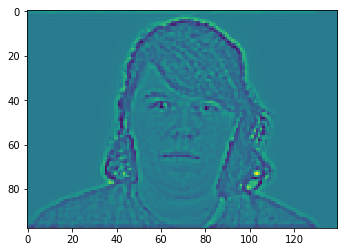

In [16]:
plt.imshow(image[:,:].detach().numpy().reshape((98, 140)))

## Génération des 2 datasets

In [5]:
what_gender_trainer = WhatGenderTrainer(args, retina)

Initialisation WhatTrainer

Initialisation dataset_train
Generating training dataset
0 10
1 20
2 30
3 40
4 50
5 60
6 70
7 80
8 90
9 100
10 110
11 120
12 130
13 140
14 150
15 160
16 170
17 180
18 190
19 200
20 210
21 220
22 230
23 240
24 250
25 260
26 270
27 280
28 290
29 300
30 310
31 320
32 330
33 340
34 350
35 360
36 370
37 380
38 390
39 400
40 410
41 420
42 430
43 440
44 450
45 460
46 470
47 480
48 490
49 500
50 510
51 520
52 530
53 540
54 550
55 560
56 570
57 580
58 590
59 600
60 610
61 620
62 630
63 640
64 650
65 660
66 670
67 680
68 690
69 700
70 710
71 720
72 730
73 740
74 750
75 760
76 770
77 780
78 790
79 800
80 810
81 820
82 830
83 840
84 850
85 860
86 870
87 880
88 890
89 900
90 910
91 920
92 930
93 940
94 950
95 960
96 970
97 980
98 990
99 1000
chemin ../tmp/train_loader_faces_2019-07-25_14h14.pt
Done!

Initialisation dataset_test
Generating testing dataset
0 10
1 20
2 30
3 40
4 50
5 60
6 70
7 80
8 90
9 100
10 110
11 120
12 130
chemin ../tmp/test_loader_faces_2019-07-25_14h

In [5]:
train_loader = torch.load("../tmp/train_loader_faces_2019-07-25_14h14.pt")

In [6]:
test_loader = torch.load("../tmp/test_loader_faces_2019-07-25_14h14.pt")

In [7]:
what_gender = WhatGender(args, retina, train_loader=train_loader, test_loader=test_loader)

../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-25_14h43.pt
Entrainement du modele en cours
Initialisation WhatTrainer
Chargement train_loader
Chargement test_loader
Calcul model
Epoque n.1


RuntimeError: size mismatch, m1: [980 x 140], m2: [13824 x 1000] at ..\aten\src\TH/generic/THTensorMath.cpp:961

In [6]:
what_gender = WhatGender(args, retina)

../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-25_14h47.pt
Entrainement du modele en cours
Initialisation WhatTrainer

Initialisation dataset_train
Generating training dataset
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
0 10
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
1 20
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
fullfield (13720,)
2 30


KeyboardInterrupt: 

In [5]:
what_gender = WhatGender(args, retina)

../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-25_14h57.pt
Entrainement du modele en cours
Initialisation WhatTrainer

Initialisation dataset_train
Generating training dataset
0 10
1 20
2 30
3 40
4 50
5 60
6 70
7 80
8 90
9 100
10 110
11 120
12 130
13 140
14 150
15 160
16 170
17 180
18 190
19 200
20 210
21 220
22 230
23 240
24 250
25 260
26 270
27 280
28 290
29 300
30 310
31 320
32 330
33 340
34 350
35 360
36 370
37 380
38 390
39 400
40 410
41 420
42 430
43 440
44 450
45 460
46 470
47 480
48 490
49 500
50 510
51 520
52 530
53 540
54 550
55 560
56 570
57 580
58 590
59 600
60 610
61 620
62 630
63 640
64 650
65 660
66 670
67 680
68 690
69 700
70 710
71 720
72 730
73 740
74 750
75 760
76 770
77 780
78 790
79 800
80 810
81 820
82 830
83 840
84 850
85 860
86 870
87 880
88 890
89 900
90 910
91 920
92 930
93 940
94 950
95 960
96 970
97 980
98 990
99 1000
chemin ../tmp/train_loader_faces_2019-07-25_15h01.pt
Done!

Initialisation dataset_test
Generating testing dataset
0 10
1 20

RuntimeError: size mismatch, m1: [10 x 13720], m2: [13824 x 1000] at ..\aten\src\TH/generic/THTensorMath.cpp:961